In [1]:
#import necessary packages 
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import yellowbrick as yb
import boto3

In [2]:
#Must enter the credentails below to run
S3_Key_id=''
S3_Secret_key=''

def pull_data(Key_id, Secret_key, file):
   
    BUCKET_NAME = "gtown-wildfire-ds"
    OBJECT_KEY = file
    client = boto3.client(
        's3',
        aws_access_key_id= Key_id,
        aws_secret_access_key= Secret_key)
    obj = client.get_object(Bucket= BUCKET_NAME, Key= OBJECT_KEY) 
    file_df = pd.read_csv(obj['Body'])
    return (file_df)

#Pull in the Machine Learning Table 1 csv
file = 'MLTable1.csv'
df_MLT = pull_data(S3_Key_id, S3_Secret_key, file)
df_MLT.head()

,Unnamed: 0,brightness,scan,track,confidence,bright_t31,frp,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Air Temperature Average (degF),...,New England Region,Ohio Region,Pacific Northwest Region,Rio Grande Region,Souris-Red-Rainy Region,South Atlantic-Gulf Region,Tennessee Region,Texas-Gulf Region,Upper Colorado Region,Upper Mississippi Region
0,1,312.5,1.2,1.1,85,269.1,21.9,11.5,0.0,2.0,...,0,1,0,0,0,0,0,0,0,0
1,3,309.8,4.0,1.9,68,289.9,82.0,7.8,0.0,-8.0,...,0,0,0,0,0,0,0,0,0,1
2,4,312.8,4.0,1.9,80,287.1,103.7,11.3,0.0,14.0,...,0,0,0,0,0,0,0,0,0,0
3,5,310.2,4.0,1.9,70,287.3,83.6,8.4,0.0,11.0,...,0,0,0,0,0,0,0,0,0,0
4,10,300.4,1.0,1.0,28,281.6,6.3,12.8,0.0,15.0,...,0,0,0,0,0,0,1,0,0,0


In [3]:
#Drop the 'Unnamed: 0' column
df_MLT2 = df_MLT.drop('Unnamed: 0', axis = 1)

In [4]:
#Identifying the percentage of missing values present in each respective column of the dataframe. All columns are fully populated for further analysis. 
percent_missing = df_MLT2.isnull().sum() * 100 / len(df_MLT)
print(percent_missing)

brightness                                              0.0
scan                                                    0.0
track                                                   0.0
confidence                                              0.0
bright_t31                                              0.0
frp                                                     0.0
Precipitation Accumulation (in) Start of Day Values     0.0
Precipitation Increment (in)                            0.0
Air Temperature Average (degF)                          0.0
Soil Moisture Percent -2in (pct) Start of Day Values    0.0
Relative Humidity Enclosure (pct)                       0.0
Wind Speed Average (mph)                                0.0
nearbydetections                                        0.0
FIRE_DETECTED                                           0.0
1                                                       0.0
Aqua                                                    0.0
Terra                                   

In [5]:
#Seperate data sets as labels and features.
X = df_MLT2.drop('FIRE_DETECTED', axis=1)
y = df_MLT2['FIRE_DETECTED']
features = ["brightness", "scan", "track", "confidence", "bright_t31", "frp", "Precipitation Accumulation (in) Start of Day Values", "Precipitation Increment (in)", "Air Temperature Average (degF)", "Soil Moisture Percent -2in (pct) Start of Day Values", "Relative Humidity Enclosure (pct)", "Wind Speed Average (mph)", "nearbydetections", "1", "Aqua", "Terra", "MODIS", "Arkansas-White-Red Region", "California Region", "Great Basin Region", "Great Lakes Region", "Hawaii Region", "Lower Colorado Region", "Lower Mississippi Region", "Mid Atlantic Region", "Missouri Region", "New England Region", "Ohio Region", "Pacific Northwest Region", "Rio Grande Region", "Souris-Red-Rainy Region", "South Atlantic-Gulf Region", "Tennessee Region", "Texas-Gulf Region", "Upper Colorado Region", "Upper Mississippi Region"]

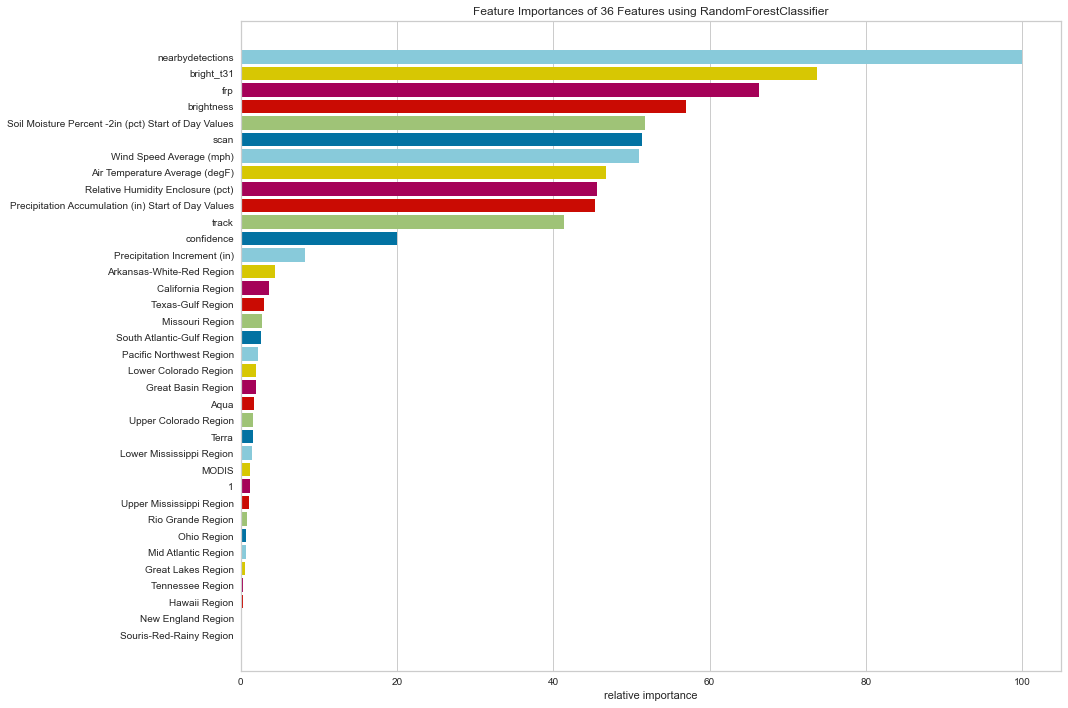

<AxesSubplot:title={'center':'Feature Importances of 36 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [6]:
#Use RandomForestClassifier to plot feature importance for each feature in our dataset. 
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features import FeatureImportances

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model, labels=features, size=(1080, 720))

viz.fit(X, y)

viz.show()

/Users/phoebeclark/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


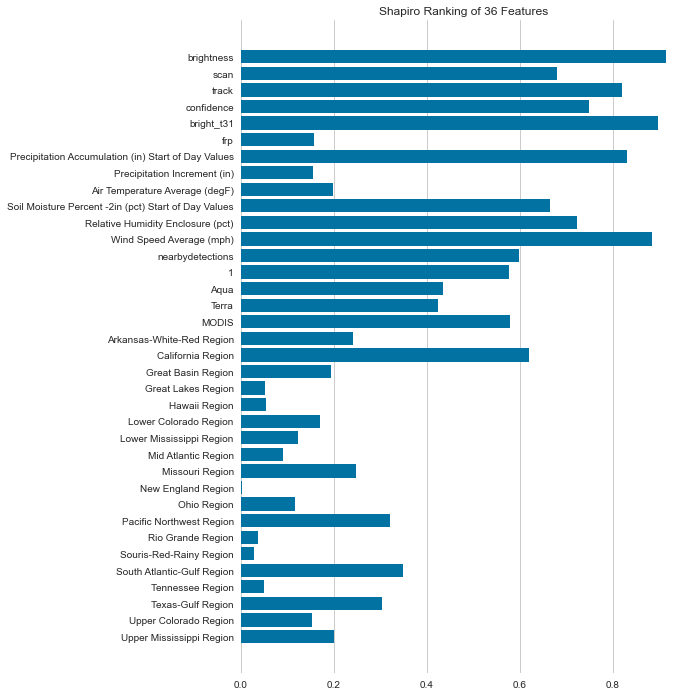

<AxesSubplot:title={'center':'Shapiro Ranking of 36 Features'}>

In [7]:
#Create a Shaprio ranking of our features. This ranking suggests that our most important features will be brightness, confidence, precipitation accumulation and wind speed average. Unsuprisingly, we can also see that the California region is our highest ranking region.  
from yellowbrick.features import Rank1D

fig, ax = plt.subplots(1, figsize=(8, 12))
vzr = Rank1D(ax=ax)
vzr.fit(X, y)
vzr.transform(X)
sns.despine(left=True, bottom=True)
vzr.poof()

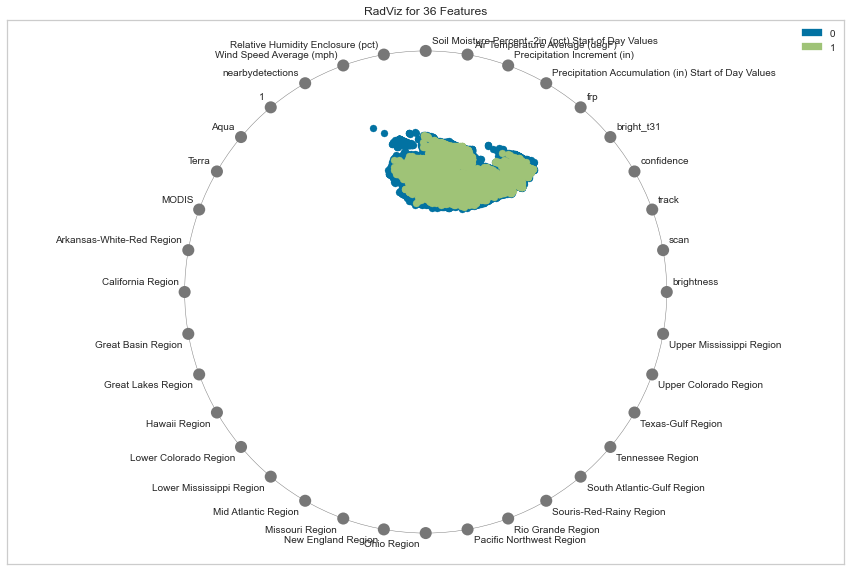

<AxesSubplot:title={'center':'RadViz for 36 Features'}>

In [8]:
#Use YellowBrick's RadViz to plot each of the features on a circle. The classes 0 and 1 indicate whether or not a fire was detected. 
from yellowbrick.features import RadViz

# Specify the target classes
classes = ["0", "1"]

# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=features, size=(1080, 720))

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Draw the data

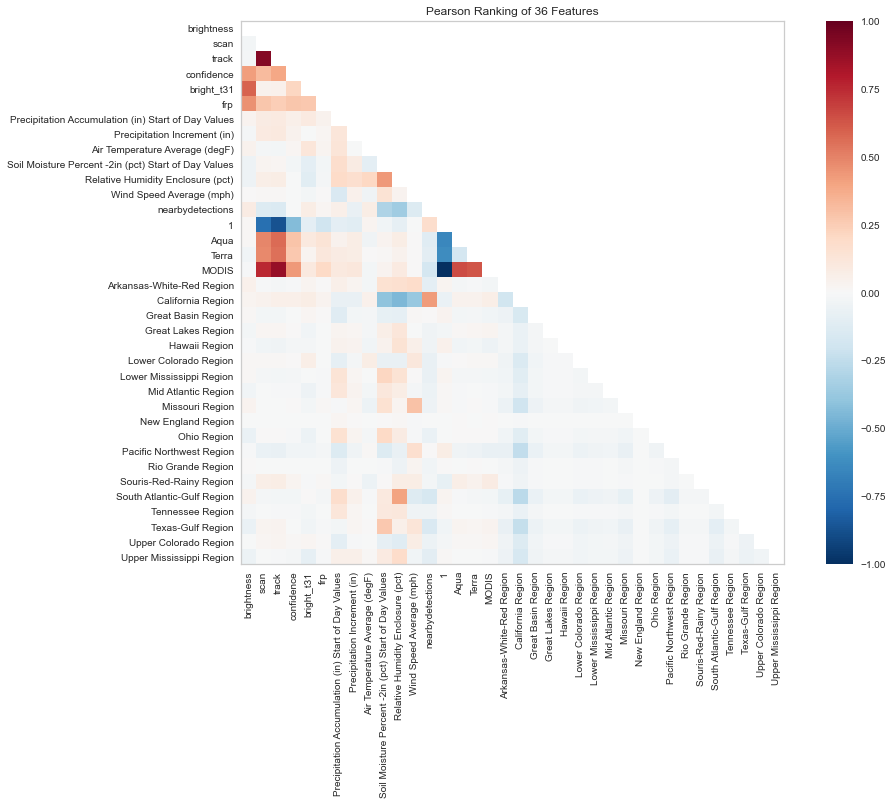

<AxesSubplot:title={'center':'Pearson Ranking of 36 Features'}>

In [9]:
#Use Yellowbrick's Rank2D to create a Pearson ranking of features in order to visualize important correlations present in our data. 
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson', features=features, size=(1080, 720))

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

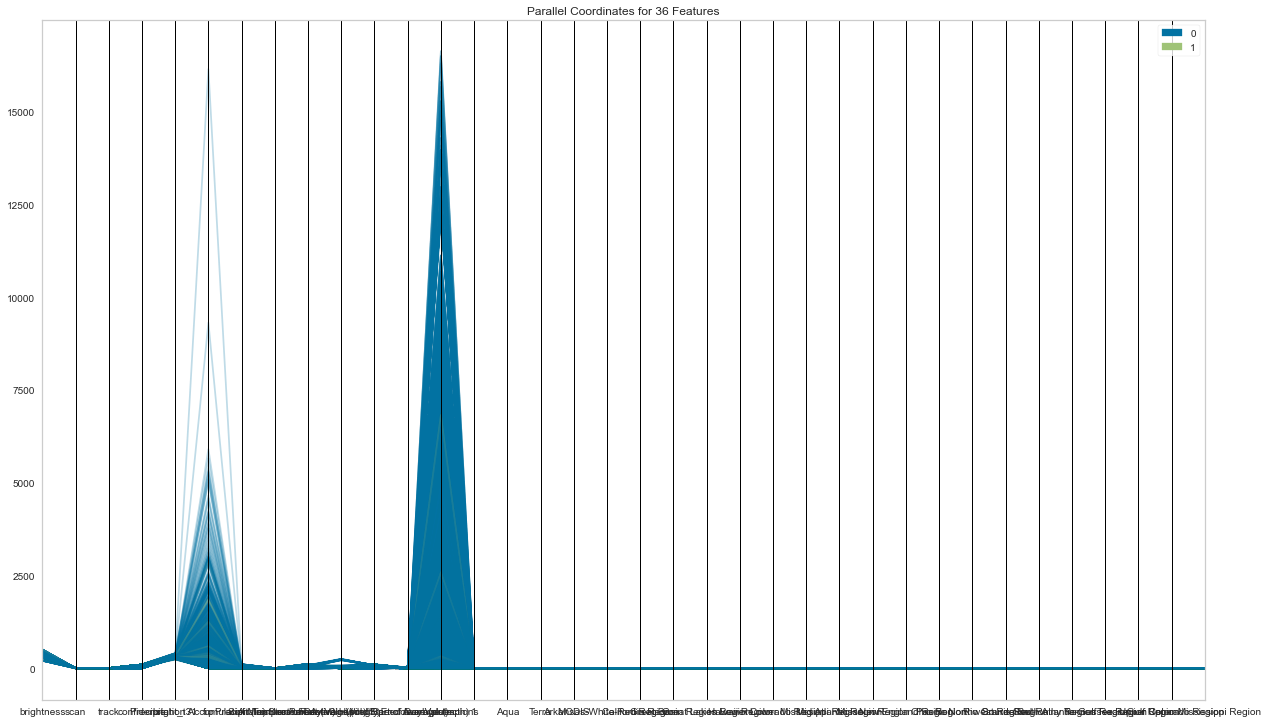

<AxesSubplot:title={'center':'Parallel Coordinates for 36 Features'}>

In [10]:
#Analyze parallel coordinates for our features using Yellowbricks' ParallelCoordinates. The classes 0 and 1 indicate whether or not a fire was detected. 
from yellowbrick.features import ParallelCoordinates
features = ["brightness", "scan", "track", "confidence", "bright_t31", "frp", "Precipitation Accumulation (in) Start of Day Values", "Precipitation Increment (in)", "Air Temperature Average (degF)", "Soil Moisture Percent -2in (pct) Start of Day Values", "Relative Humidity Enclosure (pct)", "Wind Speed Average (mph)", "nearbydetections", "1", "Aqua", "Terra", "MODIS", "Arkansas-White-Red Region", "California Region", "Great Basin Region", "Great Lakes Region", "Hawaii Region", "Lower Colorado Region", "Lower Mississippi Region", "Mid Atlantic Region", "Missouri Region", "New England Region", "Ohio Region", "Pacific Northwest Region", "Rio Grande Region", "Souris-Red-Rainy Region", "South Atlantic-Gulf Region", "Tennessee Region", "Texas-Gulf Region", "Upper Colorado Region", "Upper Mississippi Region"]


classes = ["0", "1"]

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features, sample=0.05, 
    shuffle=True, size=(1500, 900)
)

# Fit and transform the data to the visualizer
visualizer.fit(X, y)
visualizer.transform(X)

# Finalize the title and axes then display the visualization
visualizer.show()

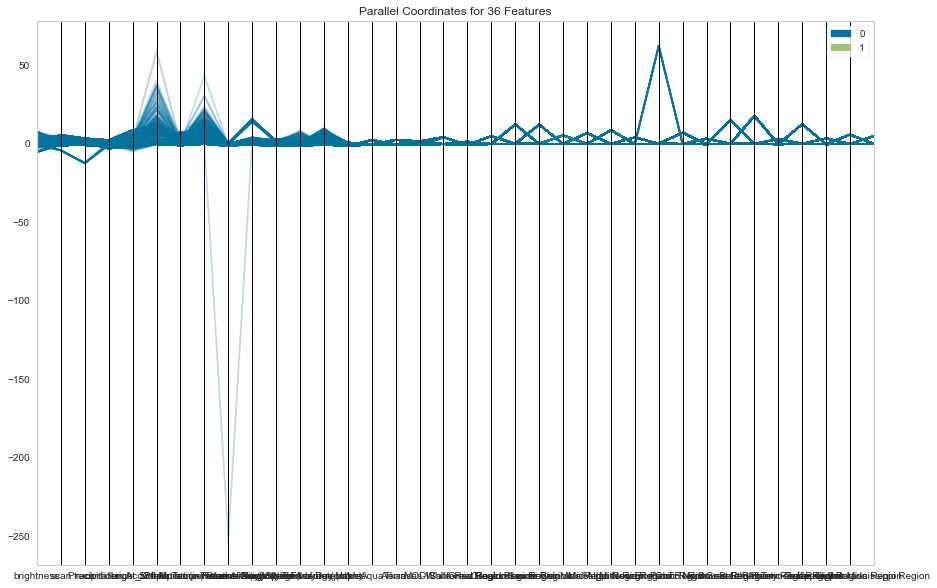

<AxesSubplot:title={'center':'Parallel Coordinates for 36 Features'}>

In [11]:
#Analyze parallel coordinates for our features using Yellowbricks' ParallelCoordinates, using a data normalizer this time. 
visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', # This time we'll specify a normalizer
    sample=0.05, shuffle=True, size=(1080, 720)
)

# Fit the visualizer and display it
visualizer.fit(X, y)
visualizer.transform(X)

visualizer.show()

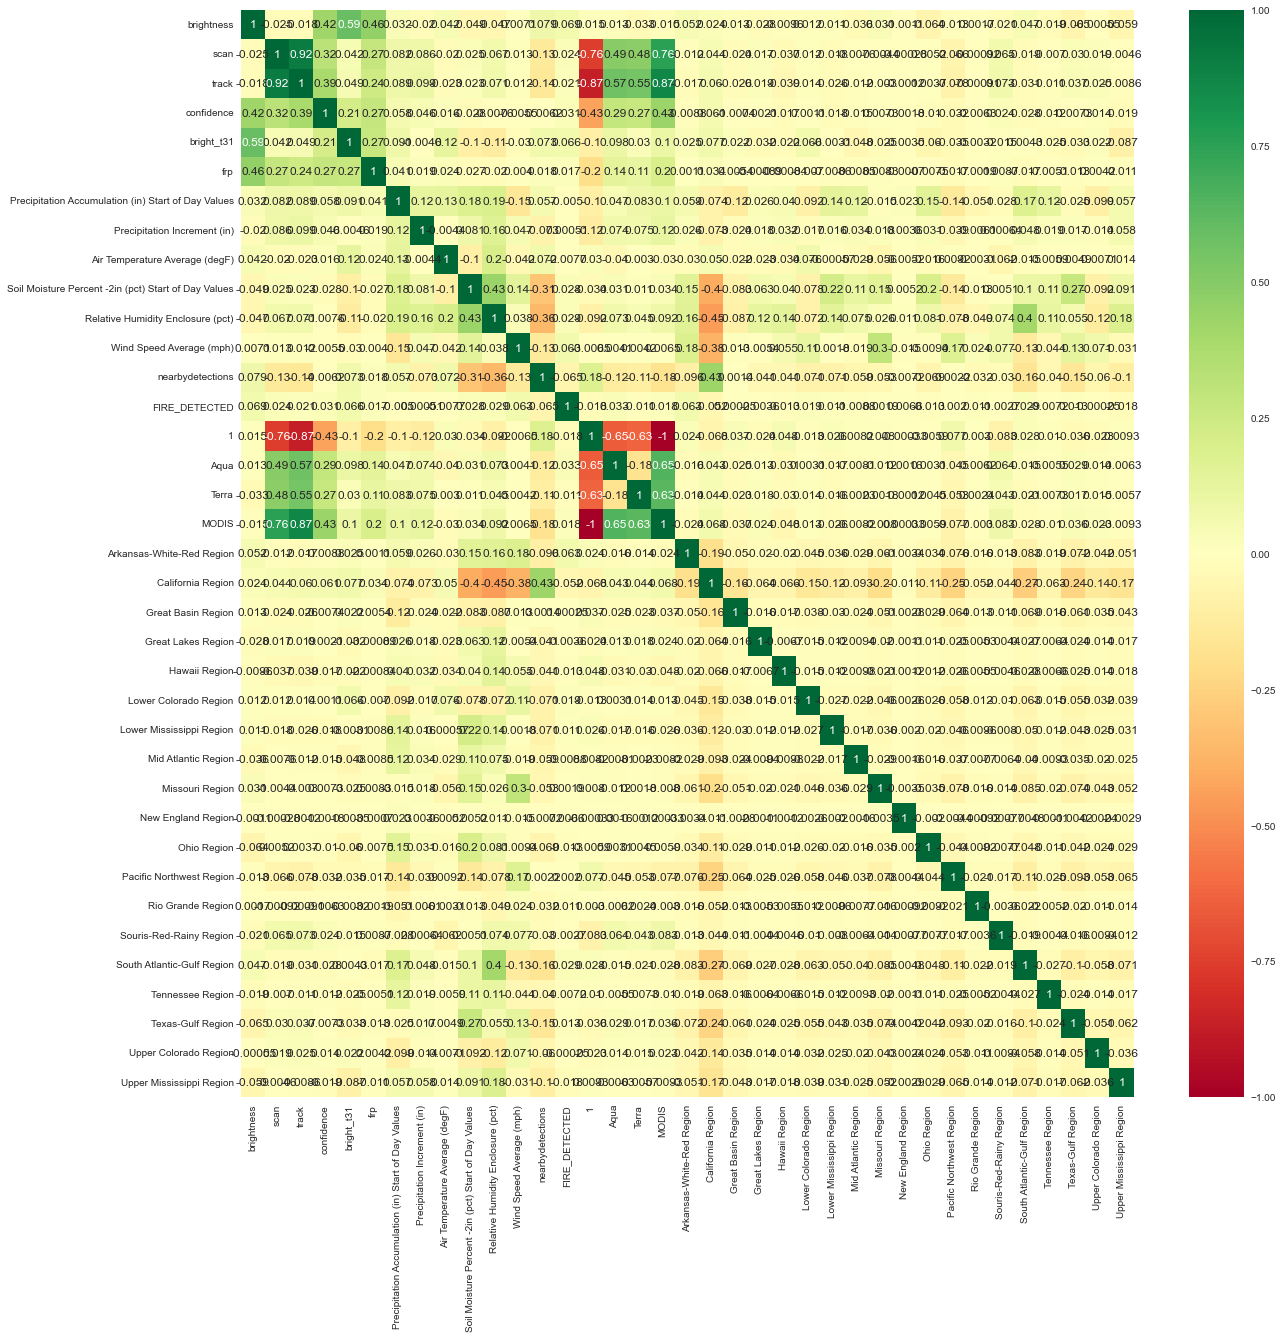

In [12]:
#Create a full correlation matrix to better distinguish strong and weak correlations between each of our features. 
corrmat = df_MLT2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_MLT2[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [15]:
#Analyze feature importance using Sklearn's ExtraTreesClassifier.
from sklearn.ensemble import ExtraTreesClassifier
array = df_MLT2.values
X = array[:,0:41663]
Y = array[:,15]
model = ExtraTreesClassifier(n_estimators = 100)
model.fit(X, y)
print(model.feature_importances_)

[1.24628603e-03 1.01793148e-03 1.01253027e-03 6.12341193e-04
 1.41898021e-03 7.96924465e-04 1.15340006e-03 3.56613958e-04
 1.14339524e-03 1.19490037e-03 1.21717088e-03 1.62662906e-03
 2.10824108e-03 9.79945820e-01 2.76056178e-04 4.14380551e-04
 2.49943465e-04 2.58182585e-04 1.52162245e-03 1.12742556e-03
 6.17835536e-05 7.96586609e-06 3.56279212e-05 1.02357681e-04
 8.21167281e-05 2.83799564e-05 1.14159983e-04 6.12007597e-06
 5.18251940e-05 8.66504124e-05 3.90195272e-05 8.59940052e-06
 3.58555588e-04 8.98560619e-06 1.45816281e-04 4.00615752e-05
 1.23199807e-04]
